In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical 

In [3]:
def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        x = datadict[b'data']
        y = datadict[b'labels']
        x = x.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  
        return x, np.array(y)


data_dir = "cifar-10-batches-py"
x_train, y_train = [], []

for i in range(1, 6):
    x, y = load_cifar_batch(os.path.join(data_dir, f"data_batch_{i}"))
    x_train.append(x)
    y_train.append(y)

x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)


x_test, y_test = load_cifar_batch(os.path.join(data_dir, "test_batch"))

print(f"Training data shape: {x_train.shape}")  
print(f"Test data shape: {y_test.shape}")  


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000,)


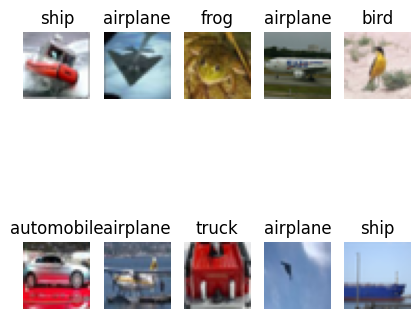

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(5, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0, len(x_train))
    plt.imshow(x_train[idx])
    plt.title(classes[y_train[idx]])
    plt.axis("off")

plt.show()


In [5]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

print("training and label data",x_train.shape,y_train.shape)
print("test and label data",x_test.shape,y_test.shape)

training and label data (50000, 32, 32, 3) (50000, 10)
test and label data (10000, 32, 32, 3) (10000, 10)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.1,
    fill_mode = "nearest"
)

datagen.fit(x_train)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Flatten,Dense,Dropout,BatchNormalization


model = Sequential([
    Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',padding = "same",input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',padding = "same"),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    Conv2D(filters=128,kernel_size=(3,3),activation = 'relu',padding = "same"),
    BatchNormalization(),
    Conv2D(filters=128,kernel_size=(3,3),activation = 'relu',padding = "same"),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.3),

    Conv2D(filters=256,kernel_size=(3,3),activation = 'relu',padding = "same"),
    BatchNormalization(),
    Conv2D(filters=256,kernel_size=(3,3),activation = 'relu',padding = "same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(512,activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

c:\Users\Aadvik Mazumdar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,253,834 (12.41 MB)

 Trainable params: 3,251,018 (12.40 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [9]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.001)
model.compile(
    loss = 'categorical_crossentropy',optimizer = optimizer ,metrics = ['accuracy']
)

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor = "val_loss",factor = 0.5 , patience = 3 , min_lr =1e-6)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train,batch_size = 64),validation_data = (x_test,y_test),epochs=30,callbacks = [lr_scheduler])

Epoch 1/30


c:\Users\Aadvik Mazumdar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 243s 307ms/step - accuracy: 0.3371 - loss: 2.1294 - val_accuracy: 0.4252 - val_loss: 1.8883 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 366s 468ms/step - accuracy: 0.5600 - loss: 1.2442 - val_accuracy: 0.6591 - val_loss: 1.0301 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 203ms/step - accuracy: 0.6461 - loss: 1.0105 - val_accuracy: 0.6477 - val_loss: 1.1152 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 154ms/step - accuracy: 0.6948 - loss: 0.8726 - val_accuracy: 0.7021 - val_loss: 0.9160 - learning_rate: 0.0010
Epoch 5/30
723/782 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.7261 - loss: 0.7924

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test) 
print(test_acc *100,loss)

NameError: name 'model' is not defined

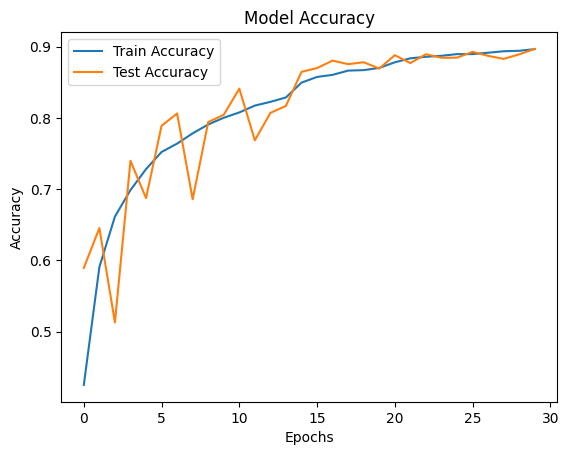

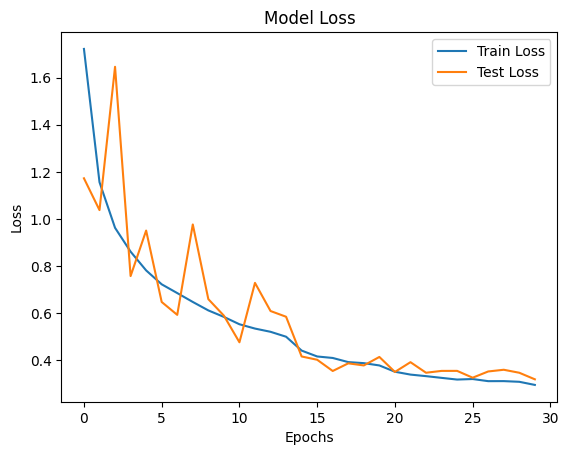

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
